Introduction to Data Science<br/>
[Oregon Curriculum Network](http://www.4dsolutions.net/ocn)

Notebooks: 
[[1](IntroDS001.ipynb)]
[[2](IntroDS002.ipynb)]
[[3](IntroDS003.ipynb)]
[[4](IntroDS004.ipynb)]
[[5](IntroDS005.ipynb)]
[[6](IntroDS006.ipynb)]
[[Appendix](Appendix.ipynb)]

# Collecting the Tools

## Anaconda

Like many involved in data science, I encourage getting the Anaconda distribution and relying on the conda package manager, not only to install packages, but to manage environments more generally.

However, no introduction to the Python toolchest can afford to ignore pip, and the conda documentation does a good job describing their differences.  One may use both.

#### A Story from the Real World

This story is examplary of the kind of situation you might encounter.

When running on an older MacBook Pro, I encountered an incompatibility with the latest numpy that was frustrating everything my in workhorse Python 3.7 environment.  

I had just done ```python upgrade --all``` only later remembering this had led to disaster before.  

Fortunately, I was able to track down the source of the bug (the newest numpy [won't run on old Macs](https://github.com/das-developers/condaCDF/issues/1)) and conda managed to figure a way to downgrade to numpy 1.7.3 that apparently involved no other changes, so I got to keep almost all of the upgrade.

But then my Python 3.8 environment insisted on numpy=1.7.3 or above, and installing from the default channel, that would not work.  So I added [conda-forge](https://conda-forge.org/) as another channel and [got numpy=1.7.3 from there](https://campus.datacamp.com/courses/conda-essentials/utilizing-channels?ex=5) and that all worked great.

## Let's Talk About Typesetting...

A data scientist likely knows some $\LaTeX$ but maybe never wrote a whole thesis in it.  We're in a [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/What%20is%20the%20Jupyter%20Notebook.html) and need some [math expressions]((https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) thanks to [MathJax](https://www.mathjax.org/).

Jupyter is our principal tool in many dimensions, as it includes our kernel language (Python), along with many auxilliary features, such as [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

The console query below requests that Jupyter list its possible kernels on Kirbys-MacBook-Pro:

```console
(base) Kirbys-MacBook-Pro:python_camp mac$ jupyter kernelspec list
Available kernels:
  python3    /Users/mac/opt/anaconda3/share/jupyter/kernels/python3
```

So thanks to LaTeX (OK to write it that way too), I can intersperse typeset mathematics with my runnable code.  Often the two will do the "same thing" with the typeset version providing a summary picture of what the source code actually does, when run through its kernel interpreter. 

The first equation below shows off how the notation of linear algebra, with its many matrices, is within our purview, as $LaTeX$ers. 

The second equation is one of Ramanujan's.  I'm tempted to verify it using an arbitrary precision library.  The sequence of digits on the right compared to those on the left, serve an inductive reasoning process.  Euler is right:  mathematics proceeds inductively and then, if we're lucky, we'll get a deductive proof someday, from some genius.

$\LaTeX$

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

The source code for the two above is demarcated differently than those below, which use \$\$.  The first two are the same and have to do with "choosing". For example how many five card hands might be dealt from a standard deck of fifty-two cards?  

The third shows how that choice algorithm features when computing the coefficients of a polynomial of a specific form. These correspond to the numbers in row n of Pascal's Triangle, a binomial distribution that smooths to a Gaussian distribution at the limit.

The last two formulae are likewise special to the statistical sciences (data science, cybernetics, psychometrics):  Bayes' Rule and the Chi-Squared test.

$$
\frac{n!}{k!(n - k)!} = \binom{n}{k} = {}^{n}C_{k} = C_{n}^k
$$
<br />
$$
\frac{n!}{k!(n - k)!} = \binom{n}{k}
$$
<br />
$$
(x+y)^n = \sum_{k=0}^n {n \choose k} x^{n - k} y^k
$$
<br />
$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$
<br />
$$
\tilde{\chi}^2=\frac{1}{d}\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}
$$


## Python Itself

So far, we have not talked to the Python3 kernel at all.  Lets do so.

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

Lets verify the equation above, one of Ramanujan's, using [mpmath](http://mpmath.org/) for arbitrary precision computations, and generally included with Anaconda.  Try ```conda search mpmath``` if you need to install it.

We'll use 60 decimal places of precision, but this could be increased.  You will need to continue the continued fraction if so.

In [1]:
import mpmath
from mpmath import e, pi
print(mpmath.libmp.BACKEND)
mpmath.mp.dps = 100
two   = mpmath.mpf('2')
five  = mpmath.mpf('5')
root5 = mpmath.mpf('5').sqrt()
phi = (1 + root5)/2

term = "(1 + (e ** (-2*{} * pi))/{})"

def cont_frac(n, c=1):
    """
    Recursively build the continued fraction, 
    as a string, to level of depth n
    """
    if n==0:
        return "1"
    else:    
        return "(1 + ((e ** (-2*{} * pi)/{})))".format(c, cont_frac(n-1, c+1))

print(eval(cont_frac(10))) # evaluate the continued fraction
print(1/(((phi * root5).sqrt() - phi) * e ** (two/five * pi))) # left side of the equation
print("Ta daa!")

gmpy
1.001867436219318606077227680424157087122424127427497054500130190210949798909562825712938250353099963
1.001867436219318606077227680424157087122424127427497054500130190210949798909562825712938250353099963
Ta daa!


Cool!  Now, back to $\LaTeX$:

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

The formula above is an expression of Bayes' Theorem, which comes in many forms.  

Give $\LaTeX$ a workout as you feel led.  Here's another look at Bayes' Theorem.

$$
\frac{P(A \mid B) \, P(B)}{P(A)}  = P(A \cap B) = \frac{P(B \mid A) \, P(A)}{P(B)} 
$$

Links:

* [Inductive Reasoning](https://en.wikiquote.org/wiki/Inductive_reasoning)
* [LaTeX Symbols](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)
* [Calculator of Tomorrow: Using Arbitrary Precision](https://medium.com/@kirbyurner/calculator-of-tomorrow-using-arbitrary-precision-8f219b0092d9)

### Data Formats

* JSON
* XML
  * [Brief History](https://sonra.io/2016/10/18/brief-history-xml-hype-useful-data-format/)
  * [pandas to XML?](https://stackoverflow.com/questions/18574108/how-do-convert-a-pandas-dataframe-to-xml)
* CSV

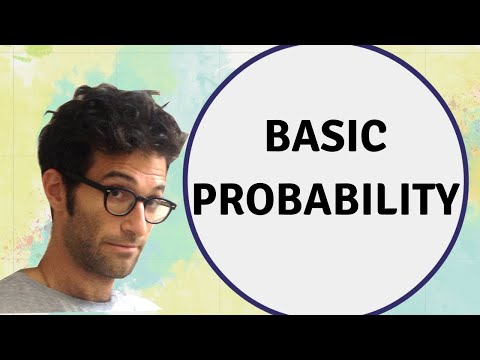

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('SrEmzdOT65s')

## pandas: Our Spreadsheet Workalike

As I discussed in class, spreadsheets work well as scratch pads, but are somewhat volatile and tough to nail down programmatically.  

How does one include a spreadsheet as one more object in a general purpose programming language?  We're not talking about macros here, and you're afraid of vendor lock in (lets say).

Think of a pandas DataFrame as a patch of cloth.  Sometimes you will want to stitch frames together on some common label.  Other times you will want to split them (cut them) into pieces.  You might want to think of yourself as some kind of tailor or clothing designer.

In [3]:
import pandas as pd
pd.__version__

'1.0.3'

In [4]:
hbo = pd.DataFrame({"Show":["GoT","WW", "Other"], 
                    "Male":[80, 100, 50], 
                    "Female":[120, 25, 125]})
hbo.set_index("Show", inplace=True)
hbo

,Male,Female
Show,,
GoT,80,120
WW,100,25
Other,50,125


In [5]:
hbo["Total"] = hbo.Male + hbo.Female
hbo

,Male,Female,Total
Show,,,
GoT,80,120,200
WW,100,25,125
Other,50,125,175


In [6]:
bottom_row = hbo.sum(axis=0)
hbo = hbo.append(pd.Series(bottom_row, index=hbo.columns, name='Total'))
hbo

,Male,Female,Total
Show,,,
GoT,80,120,200
WW,100,25,125
Other,50,125,175
Total,230,270,500


In [7]:
df1 = pd.DataFrame({"A":[1,2],"B":[0,1],"C":[2,2]})
df2 = pd.DataFrame({"A":[5,2],"C":[7,7],"D":[9,8]})
df1

,A,B,C
0,1,0,2
1,2,1,2


In [8]:
df2

,A,C,D
0,5,7,9
1,2,7,8


In [9]:
pd.concat([df1, df2],axis=1)

,A,B,C,A,C,D
0,1,0,2,5,7,9
1,2,1,2,2,7,8


In [10]:
pd.concat([df1, df2],axis=0)

,A,B,C,D
0,1,0.0,2,NaN
1,2,1.0,2,NaN
0,5,NaN,7,9.0
1,2,NaN,7,8.0


In [11]:
pd.concat([df1, df2],axis=0).fillna(-1)

,A,B,C,D
0,1,0.0,2,-1.0
1,2,1.0,2,-1.0
0,5,-1.0,7,9.0
1,2,-1.0,7,8.0


pandas gives us a way to import data at the top of a worksheet, a Notebook, and then document all the step-by-step transformations that bring us to our (thrilling?) conclusions.  

Stakeholders have an opportunity to run the same Notebook and verify conclusions, and/or probe whatever weaknesses, and/or branch off in new directions.

Yes, maybe it's more work to manipulate a DataFrame programmatically, than to mouse around in a spreadsheet, but once it's all working, you have a potentially better documented and more robust pipeline or workflow.

A first DataFrame.  pandas gives us so many ways to get the ball rolling.  However one of the most straightforward ways is by subitting a dictionary, with keys giving column names, and values giving vertically sequenced data.

In [13]:
# regular python conventions
zoo = pd.DataFrame({"Species":["Zebra","Lion","Tiger","Bear"],
                    "Name":["Zorro", "Lila", "Telly", "Boris"],
                    "Age":[1,2,3,4],  # integers, not exact
                    "Weight":[150.1, 200.0, 190.2, 345.4]})

zoo.set_index("Name", inplace=True)
zoo  # this works too

,Species,Age,Weight
Name,,,
Zorro,Zebra,1,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [14]:
storage = zoo.to_json()
storage

'{"Species":{"Zorro":"Zebra","Lila":"Lion","Telly":"Tiger","Boris":"Bear"},"Age":{"Zorro":1,"Lila":2,"Telly":3,"Boris":4},"Weight":{"Zorro":150.1,"Lila":200.0,"Telly":190.2,"Boris":345.4}}'

In [15]:
new_zoo = pd.read_json(storage)
new_zoo

,Species,Age,Weight
Zorro,Zebra,1,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [16]:
periodic_table = pd.read_json("http://thekirbster.pythonanywhere.com/api/elements?elem=all")

In [17]:
type(periodic_table)

pandas.core.frame.DataFrame

In [18]:
new_zoo.rename_axis("Name", inplace=True)
new_zoo

,Species,Age,Weight
Name,,,
Zorro,Zebra,1,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [19]:
print(new_zoo.index.name)

Name


In [20]:
outbound = zoo.to_csv()
print(outbound) # remove print to see single string
with open("zoo.csv", "w") as f:
    f.write(outbound)

Name,Species,Age,Weight
Zorro,Zebra,1,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4



In [21]:
with open("zoo.csv", "r") as f:
    zoo = pd.read_csv(f)
zoo

,Name,Species,Age,Weight
0,Zorro,Zebra,1,150.1
1,Lila,Lion,2,200.0
2,Telly,Tiger,3,190.2
3,Boris,Bear,4,345.4


In [22]:
zoo.set_index("Name", inplace=True)
zoo

,Species,Age,Weight
Name,,,
Zorro,Zebra,1,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [23]:
zoo.loc['Lila':'Boris']

,Species,Age,Weight
Name,,,
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [24]:
zoo.loc["Zorro", "Age"]=5
zoo

,Species,Age,Weight
Name,,,
Zorro,Zebra,5,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [25]:
zoo

,Species,Age,Weight
Name,,,
Zorro,Zebra,5,150.1
Lila,Lion,2,200.0
Telly,Tiger,3,190.2
Boris,Bear,4,345.4


In [26]:
# animals that have the letter i in them
zoo.loc[[row for row in zoo.index if "i" in row]]

,Species,Age,Weight
Name,,,
Lila,Lion,2,200.0
Boris,Bear,4,345.4


In [103]:
web_data = pd.read_json("http://thekirbster.pythonanywhere.com/"
                        "api/elements?elem=all")

In [104]:
web_data.head()

,Rg,Cr,Th,Fe,Lr,Cn,Np,Mt,Ts,Be,...,Ge,Re,I,Ga,Se,Os,Ta,No,Pu,Cl
0,111,24,90,26,103,112,93,109,117,4,...,32,75,53,31,34,76,73,102,94,17
1,Rg,Cr,Th,Fe,Lr,Cn,Np,Mt,Ts,Be,...,Ge,Re,I,Ga,Se,Os,Ta,No,Pu,Cl
2,Roentgenium,Chromium,Thorium,Iron,Lawrencium,Copernicium,Neptunium,Meitnerium,Tennessine,Beryllium,...,Germanium,Rhenium,Iodine,Gallium,Selenium,Osmium,Tantalum,Nobelium,Plutonium,Chlorine
3,282,51.9962,232.038,55.8452,266,285,237,278,294,9.01218,...,72.6308,186.207,126.904,69.7231,78.9718,190.233,180.948,259,244,35.45
4,"unknown, probably transition metal",transition metal,actinide,transition metal,actinide,transition metal,actinide,"unknown, probably transition metal","unknown,probably metalloid",alkaline earth metal,...,metalloid,transition metal,diatomic nonmetal,post-transition metal,polyatomic nonmetal,transition metal,transition metal,actinide,actinide,diatomic nonmetal


Let's transpose the above, with a single T (for transpose). Rows become columns, columns become rows.

In [105]:
periodic_table = web_data.T
periodic_table.sort_values(0).head()

,0,1,2,3,4,5,6
H,1,H,Hydrogen,1.008,diatomic nonmetal,1498013115,KTU
He,2,He,Helium,4.0026,noble gas,1493462392,KTU
Li,3,Li,Lithium,6.94,alkali metal,1493462392,KTU
Be,4,Be,Beryllium,9.01218,alkaline earth metal,1493462392,KTU
B,5,B,Boron,10.81,metalloid,1493462392,KTU


Now lets rename the columns after dropping a couple.

In [106]:
periodic_table.drop([1], axis=1, inplace=True)
periodic_table.rename({0:"Protons", 1:"Symbol", 2:"Element", 3:"Mass", 4:"Category", 
                       5:"Last Modified", 6:"Initials"}, axis=1, inplace=True)

In [107]:
periodic_table.head()

,Protons,Element,Mass,Category,Last Modified,Initials
Rg,111,Roentgenium,282,"unknown, probably transition metal",1493462392,KTU
Cr,24,Chromium,51.9962,transition metal,1493462392,KTU
Th,90,Thorium,232.038,actinide,1493462392,KTU
Fe,26,Iron,55.8452,transition metal,1493462392,KTU
Lr,103,Lawrencium,266,actinide,1493462392,KTU


Let's rename the row index column to Symbol.  That a row index should have a name is somewhat optional.

In [108]:
periodic_table.index.name = "Symbol"

In [109]:
periodic_table.head()

,Protons,Element,Mass,Category,Last Modified,Initials
Symbol,,,,,,
Rg,111,Roentgenium,282,"unknown, probably transition metal",1493462392,KTU
Cr,24,Chromium,51.9962,transition metal,1493462392,KTU
Th,90,Thorium,232.038,actinide,1493462392,KTU
Fe,26,Iron,55.8452,transition metal,1493462392,KTU
Lr,103,Lawrencium,266,actinide,1493462392,KTU


The Last Modified column is somewhat opaque. The number of seconds since January 1, Year 1, is a convenient format in what to store datetimes or dates.  Lets convert.

In [110]:
test = periodic_table.loc["Ds","Last Modified"]
from datetime import datetime
datetime.fromtimestamp(test)

datetime.datetime(2017, 4, 29, 3, 39, 52)

In [111]:
periodic_table["Last Modified"] = \
periodic_table["Last Modified"].apply(lambda x: datetime.fromtimestamp(x))

In [112]:
periodic_table.head()

,Protons,Element,Mass,Category,Last Modified,Initials
Symbol,,,,,,
Rg,111,Roentgenium,282,"unknown, probably transition metal",2017-04-29 03:39:52,KTU
Cr,24,Chromium,51.9962,transition metal,2017-04-29 03:39:52,KTU
Th,90,Thorium,232.038,actinide,2017-04-29 03:39:52,KTU
Fe,26,Iron,55.8452,transition metal,2017-04-29 03:39:52,KTU
Lr,103,Lawrencium,266,actinide,2017-04-29 03:39:52,KTU


Finally, how about grouping by Category, what might that look like?

In [116]:
periodic_table.Category.unique()

array(['unknown, probably transition metal', 'transition metal',
       'actinide', 'unknown,probably metalloid', 'alkaline earth metal',
       'lanthanide', 'metalloid', 'post-transition metal', 'alkali metal',
       'noble gas', 'unknown, predicted to be noble gas',
       'diatomic nonmetal', 'unknown, probably post transition metal',
       'polyatomic nonmetal'], dtype=object)

In [118]:
periodic_table.groupby("Category").get_group("noble gas").sort_index()

,Protons,Element,Mass,Category,Last Modified,Initials
Symbol,,,,,,
Ar,18,Argon,39.9481,noble gas,2017-04-29 03:39:52,KTU
He,2,Helium,4.0026,noble gas,2017-04-29 03:39:52,KTU
Kr,36,Krypton,83.7982,noble gas,2017-04-29 03:39:52,KTU
Ne,10,Neon,20.1798,noble gas,2017-04-29 03:39:52,KTU
Rn,86,Radon,222,noble gas,2017-04-29 03:39:52,KTU
Xe,54,Xenon,131.294,noble gas,2017-04-29 03:39:52,KTU


Want to try [the Kaggle tutorial](https://www.kaggle.com/learn/pandas)?  I'm going to start it now.  [Some faculty](https://towardsdatascience.com/if-i-had-to-start-learning-data-science-again-how-would-i-do-it-78a72b80fd93) swear by Kaggle.

## Thinking About Games of Chance

We can start getting more statistically oriented within our "calculator of tomorrow", by working with some of those formulae [dealing with combinatorics](https://wikieducator.org/Casino_Math).

We're not "wasting paper" when we the same repeat content in various orders.  We're permuting, as an aid to comprehension. Expect to see these formulae again and again.

Lets put the algorithm we're implementing side by side with its typeset encoding.

$$
\frac{n!}{k!(n - k)!} = \binom{n}{k} = {}^{n}C_{k} = C_{n}^k
$$

In [30]:
from math import factorial

def binom(n,k):
    return (factorial(n)//(factorial(n-k) * factorial(k)))  

In [31]:
how_many = binom(52,5) # Poker
print(f"{how_many:,}") # fancy formatting

2,598,960


In [129]:
n = 10
[binom(n,k) for k in range(0,n+1)]  # row of Pascal's Triangle

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]

You may encounter PATH issues from time to time.  Your operating system has a PATH in mind, but then so does Python have its own search path, in the form of a mutable list of strings. We're free to add to it.

In [130]:
import os
print(os.environ['PATH'])

/Users/mac/opt/anaconda3/bin:/Users/mac/opt/anaconda3/condabin:/usr/bin:/bin:/usr/sbin:/sbin


Note that if Python source code modules are present anywhere along the Python path, we're free to import and use them interactively within our Notebook, as we would be in any REPL.  

You don't have to cram all the source code into a specific Notebook in order to use it.

In [131]:
import sys
print(sys.path)
sys.path.append("./python") # subfolder in Curriculum_Development

['/Users/mac/Documents/Curriculum_Development', '/Users/mac/opt/anaconda3/lib/python37.zip', '/Users/mac/opt/anaconda3/lib/python3.7', '/Users/mac/opt/anaconda3/lib/python3.7/lib-dynload', '', '/Users/mac/opt/anaconda3/lib/python3.7/site-packages', '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/mac/.ipython', './python']


In [132]:
import imp
import statsfun
imp.reload(statsfun)

<module 'statsfun' from './python/statsfun.py'>

In [133]:
from statsfun import pascal  # in the relative path ./python
pascal(10)  # row n of Pascal's Triangle

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]

Remember [the Galton Board](https://youtu.be/Kq7e6cj2nDw) at this juncture!


![galton](http://4dsolutions.net/ocn/graphics/randtrianim.gif)

Lets build a deck of cards showing off more of Python's standard library.  The ```product``` function we're using returns an iterator giving the Cartesian product of all rows of a thing with all columns.

Python's itertools library will generate actual permutations and combinations from iterables, if that's what you're looking for, but sometimes we just care how many there would be.

```python

def deck_of_cards(shuffled = True):
    face_cards = ['Ace', 'King', 'Queen', 'Jack']
    numb_cards = [str(i) for i in range(2, 11)]
    suits      = ['Hearts', 'Diamonds', 'Spades', 'Clubs']
    # match every card with every suit
    cards = list(product(face_cards + numb_cards, suits)) 
    if shuffled:
        shuffle(cards)
    return cards
```

A combination is like a hand of poker.  The order in which the cards are dealt is unimportant.  A permutation of that hand would put the cards in every possible order and count those separately.

Given a 52-card deck, how many unique five card hands might be dealt?  Check below for the answer.


In [138]:
from random import sample, shuffle
from statsfun import deck_of_cards

In [139]:
deck = deck_of_cards()

In [140]:
thedeck = pd.DataFrame({"Rank":[card[0] for card in deck],"Suit":[card[1] for card in deck]})

In [141]:
grouped = thedeck.groupby(by="Rank")
grouped.groups

{'10': Int64Index([19, 23, 25, 28], dtype='int64'),
 '2': Int64Index([7, 10, 13, 24], dtype='int64'),
 '3': Int64Index([3, 37, 38, 49], dtype='int64'),
 '4': Int64Index([12, 17, 21, 35], dtype='int64'),
 '5': Int64Index([2, 31, 39, 50], dtype='int64'),
 '6': Int64Index([5, 15, 27, 34], dtype='int64'),
 '7': Int64Index([9, 11, 41, 42], dtype='int64'),
 '8': Int64Index([26, 30, 36, 47], dtype='int64'),
 '9': Int64Index([4, 16, 32, 43], dtype='int64'),
 'Ace': Int64Index([1, 14, 22, 45], dtype='int64'),
 'Jack': Int64Index([8, 18, 20, 33], dtype='int64'),
 'King': Int64Index([29, 40, 46, 51], dtype='int64'),
 'Queen': Int64Index([0, 6, 44, 48], dtype='int64')}

In [142]:
grouped = thedeck.groupby(by="Suit")

In [41]:
grouped.groups

{'Clubs': Int64Index([10, 13, 14, 19, 20, 22, 26, 29, 32, 36, 48, 49, 51], dtype='int64'),
 'Diamonds': Int64Index([0, 6, 7, 9, 11, 17, 24, 35, 37, 45, 46, 47, 50], dtype='int64'),
 'Hearts': Int64Index([1, 2, 4, 15, 21, 27, 30, 31, 33, 38, 41, 43, 44], dtype='int64'),
 'Spades': Int64Index([3, 5, 8, 12, 16, 18, 23, 25, 28, 34, 39, 40, 42], dtype='int64')}

In [143]:
spades = dict(list(grouped))["Spades"]
spades

,Rank,Suit
1,Ace,Spades
4,9,Spades
8,Jack,Spades
9,7,Spades
12,4,Spades
24,2,Spades
26,8,Spades
28,10,Spades
34,6,Spades
40,King,Spades


In [144]:
shuffle(deck)

The cell below is set off from the rest, because our deck is already defined, created, and shuffled.

In [149]:
sample(deck, 5)

[('6', 'Hearts'),
 ('Queen', 'Diamonds'),
 ('Queen', 'Clubs'),
 ('6', 'Diamonds'),
 ('4', 'Diamonds')]

Python's numpy.random module lets us sample a population both with and without replacement.  If you put the card back each time, before you again pick a card, writing down your results, you might well get some repeats.  These could not be poker hands, as card dealing does not involve replacement.

## Turning to numpy

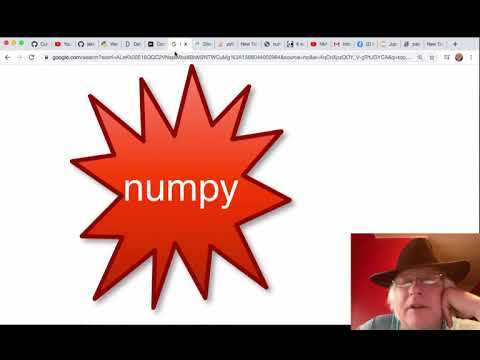

In [45]:
YouTubeVideo('OfHoxRuxuW0')

In the above Youtube I wander around (random walk) in the space of PRNGs, or pseudo-random number generators.  

The numpy ecosystem is [giving us new semantics](https://docs.scipy.org/doc/numpy/reference/random/new-or-different.html) with which to extricate ourselves from the old RandomState class, and gravitate towards a Generator instead, inside of which a new pseudo-random number generator, named [PCG64](https://www.pcg-random.org/), takes precedence.  

The old Mersenne Twister is now in what's considered an older area of our data science themed park.

Here's the new way of doing it.

In [46]:
import numpy as np

rng = np.random.default_rng(12345)
# uncomment to learn more
# ? rng

```integers``` is now the canonical way to generate integer random numbers from a discrete uniform distribution. The ```rand``` and ```randn``` methods are only available through the legacy ```RandomState```. This replaces both randint and the deprecated random_integers.

In [157]:
# turn all the cards into a long list of strings e.g. "Ace of Spades"
card_images = [f"{card} of {suit}" for card, suit in deck]

# now pick 10 cards with replacement i.e. they stay in the deck
sample = rng.choice(card_images, 10, replace=True)

# the result is a numpy array of datatype Unicode
sample

array(['Ace of Hearts', '4 of Spades', '8 of Hearts', '3 of Diamonds',
       '7 of Clubs', '9 of Clubs', '3 of Hearts', '7 of Clubs',
       '4 of Spades', 'Queen of Spades'], dtype='<U17')

# Of Bayesians and Frequentists

Have you ever come late to a fight, and by the time you arrive they're all talking about it as some past civil war.  We're all friends now.  That's how it sounds to the ears of this anthropologist, as I poke around in Data Science World.

The Frequentists enjoy the controlled experience of the laboratory and the scientific experiments involving taking many samples, and seeing if any of the rise above the others as noteworthy in some way not explained away by mere chance.

The language of p-values < 0.05 comes from Frequentism.

The Bayesians have been enjoying a boost recently because of several factors:

* an increasing amount of data thanks to the internet especially
* an intuitive approach adjusting beliefs outside the laboratory
* an increasing amount of computer power, to work with all that data

The Bayesian process involves measuring the likelihood of specific data, given a range of  explanatory models or hypotheses, and updating one's assessment of those models accordingly, in light of the incoming data.

*Bayesian Belief Update* reminds us to think in terms of curves.  Our prior belief curve, measured against the likelihood of what we're seeing, gives me an updated posterior.  

The denominator normalizes by averaging over all the outcomes and may take [a disjoint form](https://www.coursera.org/lecture/probability-intro/disjoint-events-general-addition-rule-qaYwc), as the sum of multiple sources.  In medical testing, any false positives and negatives will tend to dilute the likelihood of whatever hypothesis is proposed.

## YouTubes

You may embed Youtubes in your Jupyter Notebooks.  These may not be rendered and made playable on some versions of the rendering engine, such as the one at Github.  By cutting and pasting a Github notebook (a public one) into nbviewer, you will get the more complete rendering, with Youtubes displayed.

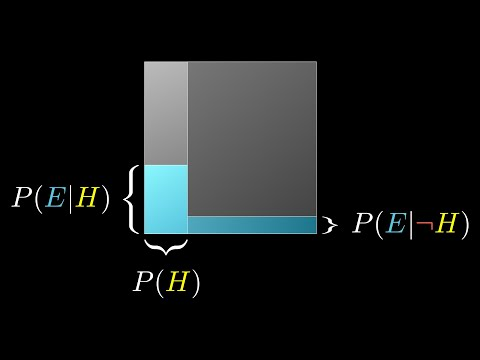

In [48]:
from IPython.display import YouTubeVideo
YouTubeVideo('HZGCoVF3YvM')

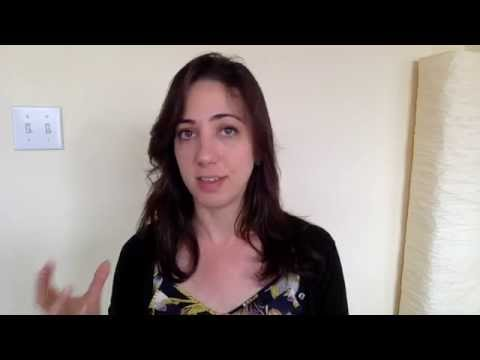

In [49]:
YouTubeVideo('BrK7X_XlGB8')

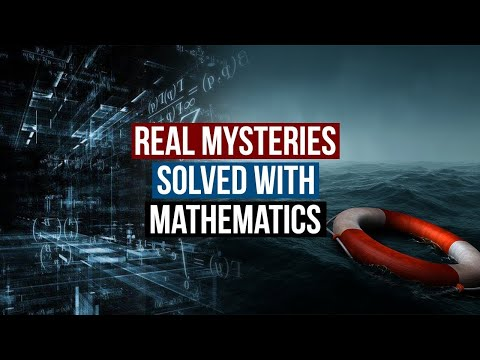

In [50]:
YouTubeVideo('82q3uYw6MuY')

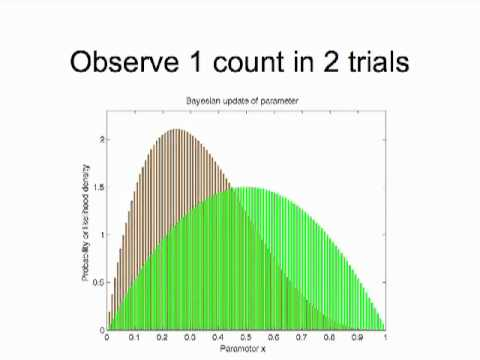

In [51]:
YouTubeVideo('H71Vl78qCXA')

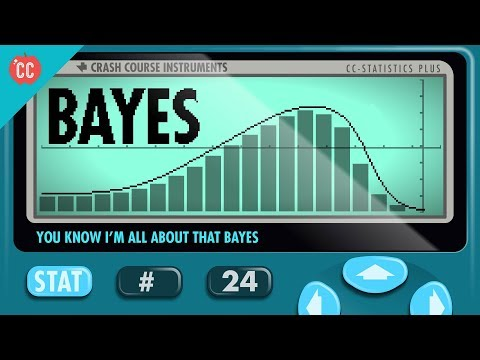

In [52]:
YouTubeVideo('9TDjifpGj-k')

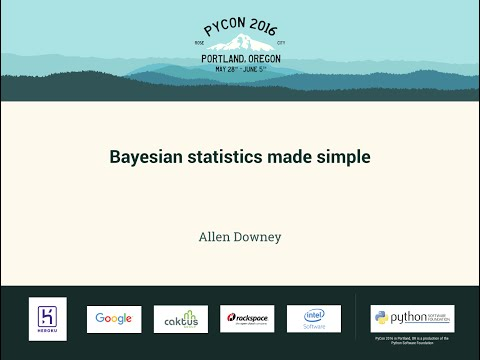

In [53]:
YouTubeVideo('TpgiFIGXcT4')

## The Turing Test

A good example of how we might use inferential reasoning is in order to ascertain whether a conversation is what we might call intelligent.  

Humans and pets get into a feedback loop, of training each other, thereby finding a dynamic equilibrium.  Humans and their computers get into feedback loops also.  An intelligent relationship may form as a result of synergy between participants.

Many professionals dream of an ideal conversationalist that provides new insights and understanding, that might also happen to be artificially intelligent, not another human being.

Siri, Alexa and other NLP services suggest a trajectory in the direction of more conversationally adept bots.

#### Uncanny Valley

![Sophia](https://media.giphy.com/media/SKT4HdqZSSPbaobtPs/giphy.gif)

Wikipedia [gives a lot of background](https://en.wikipedia.org/wiki/Uncanny_valley) on this particular meme.

Uncanny means like eerie or bizarre in some way, in a way we may find repulsive (the opposite of attractive).  Wikipedia goes into some detail with regard to films (especially animations) and what critics have said about them.

Uncanny may be [related to grotesque](https://designyoutrust.com/2018/02/mad-im-mad-youre-mad-superb-concept-artworks-michael-kutsche/?fbclid=IwAR3ksDII-YBx6PLV67mfcgQ-xVHK5MqLxNm5faRs3ZREar3KohXHiPVnCRE) but has more of that context of being tricked into thinking something's real that we're not prepared to accept as such.

If the mannequin makes no attempt to seem really humanlike, then we don't sense the possibility of being fooled.  However something with a wax museum quality likeness, and animation to boot, may leave us imaging all manner of future confusions, should such robots become commonplace.  We become anxious.  That's one of the theories.

What kinds of tests would we use to update prior beliefs regarding the probability that we're speaking with a machine intelligence and not another human?  That's what the Turing Test was all about: if we couldn't be sure, and yet the conversant was a machine, we could say "the machine has passed the test".

What expectation should we have that even humans will pass the Turing Test, once machines get more human-like and our standards change.  Might Alexa make better conversation than some of your friends?

Uncanny valley is not usually applied in this way but imagine:  you've taken some personality test and now conform to predictions.  Once you're shown your own conformity (predictability), you may go out of your way to surprise, but up to that point, you might say "the efficacy of their model in predicting my behavior was uncanny."

The question, and conclusion (either way, pass or fail), only makes sense as long as we're able to keep the meaning of "machine" intact, as in "something humanly contrived".  

If we admit or decide that nature is in the machine-making business (because nature is high tech), then we'll need to work harder to explain the difference we're looking for, perhaps by specifying more clearly the differences that make a difference.

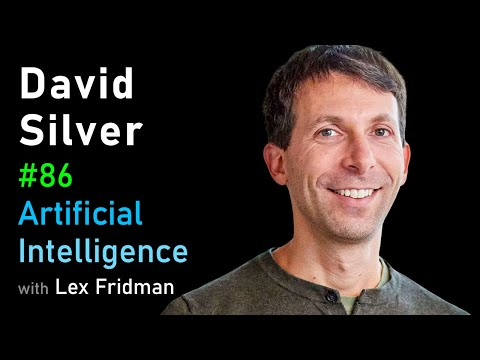

In [54]:
YouTubeVideo('uPUEq8d73JI')

## What about Hardware?

GPUs

* 

Data Science Workstations:

* [Exxact](https://www.exxactcorp.com/NVIDIA-Data-Science-Workstations)